In [1]:
cd ..

/home/gautam/Desktop/python


In [2]:
import numpy as np
from mcts.tictactoe import *
from mcts.agents import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
def run_episode(agents, env):
    done = False
    env.reset()
    total_reward = np.zeros(env.players)
    while not done:
        action = agents[env.turn].act(env)
        _,reward,done,_ = env.step(action)
        total_reward+=reward
    return total_reward

In [4]:
"""MCTS agent with UCB, c=sqrt(2), timeout = 1 tree policy against Random Agent"""

samples = 10
agent1 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=1)
agent2 = RandomAgent()
agents = [agent1, agent2]
env = CTicTacToeEnv()

rewards = np.array([run_episode(agents, env) for _ in range(samples)])
results = np.sum(rewards==1, axis=0)
print("Win Percentage for MCTS Agent with UCB policy = ", results[0]*100/samples)
print("Win Percentage for Random Agent = ", results[1]*100/samples)

Win Percentage for MCTS Agent with UCB policy =  100.0
Win Percentage for Random Agent =  0.0


In [5]:
"""MCTS agent with epsilon greedy, epsilon=0.05, timeout=1 tree policy against Random Agent"""

samples = 10
agent1 = MCTSAgent(tree_policy=epsilon_greedy(epsilon=0.05),timeout=1)
agent2 = RandomAgent()
agents = [agent1, agent2]
env = CTicTacToeEnv()

rewards = np.array([run_episode(agents, env) for _ in range(samples)])
results = np.sum(rewards==1, axis=0)
print("Win Percentage for MCTS Agent with epsilon greedy policy= ", results[0]*100/samples)
print("Win Percentage for Random Agent = ", results[1]*100/samples)

Win Percentage for MCTS Agent with epsilon greedy policy=  100.0
Win Percentage for Random Agent =  0.0


In [6]:
"""MCTS agent with UCB, c=sqrt(2), timeout = 1 tree policy against
MCTS agent with epsilon greedy, epsilon=0.05, timeout=1 tree policy"""

samples = 10
agent1 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=1)
agent2 = MCTSAgent(tree_policy=epsilon_greedy(epsilon=0.05),timeout=1)
agents = [agent1, agent2]
env = CTicTacToeEnv()

rewards = np.array([run_episode(agents, env) for _ in range(samples)])
results = np.sum(rewards==1, axis=0)
print("Win Percentage for MCTS Agent with UCB policy = ", results[0]*100/samples)
print("Win Percentage for MCTS Agent with epsilon greedy policy = ", results[1]*100/samples)

Win Percentage for MCTS Agent with UCB policy =  0.0
Win Percentage for MCTS Agent with epsilon greedy policy =  0.0


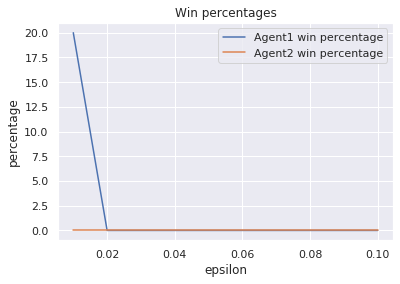

In [7]:
"""MCTS agent with UCB, c=sqrt(2), timeout=1 tree policy against 
MCTS agent with epsilon greedy, timeout=1 tree policy with various epsilon values"""

samples = 10
env = CTicTacToeEnv()
wins = []
losses= []
epsilons=[]
agent1 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=1)
for e in np.arange(0.01, 0.11, 0.01):
    agent2 = MCTSAgent(tree_policy=epsilon_greedy(epsilon=e),timeout=1)
    agents = [agent1, agent2]
    rewards = np.array([run_episode(agents, env) for _ in range(samples)])
    results = np.sum(rewards==1, axis=0)
    wins.append(results[0])
    losses.append(results[1])
    epsilons.append(e)
plt.plot(epsilons, np.array(wins)*100/samples, label='Agent1 win percentage')
plt.plot(epsilons, np.array(losses)*100/samples, label='Agent2 win percentage')
plt.title("Win percentages")
plt.xlabel("epsilon")
plt.ylabel("percentage")
plt.legend();

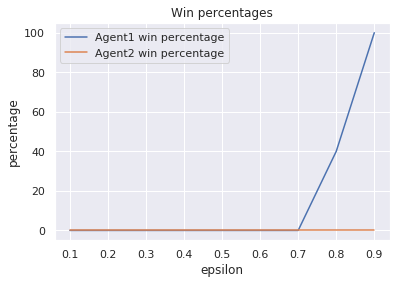

In [8]:
"""MCTS agent with UCB, c=sqrt(2), timeout=1 tree policy against 
MCTS agent with epsilon greedy, timeout=1 tree policy with various epsilon values"""

samples = 10
env = CTicTacToeEnv()
wins = []
losses= []
epsilons=[]
agent1 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=1)
for e in np.arange(0.1, 1, 0.1):
    agent2 = MCTSAgent(tree_policy=epsilon_greedy(epsilon=e),timeout=1)
    agents = [agent1, agent2]
    rewards = np.array([run_episode(agents, env) for _ in range(samples)])
    results = np.sum(rewards==1, axis=0)
    wins.append(results[0])
    losses.append(results[1])
    epsilons.append(e)
plt.plot(epsilons, np.array(wins)*100/samples, label='Agent1 win percentage')
plt.plot(epsilons, np.array(losses)*100/samples, label='Agent2 win percentage')
plt.title("Win percentages")
plt.xlabel("epsilon")
plt.ylabel("percentage")
plt.legend();

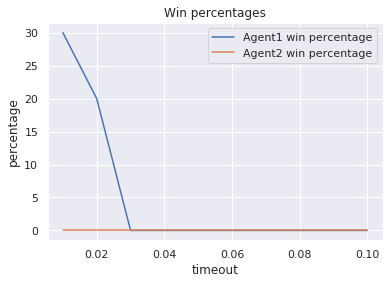

In [9]:
"""MCTS agent with UCB, c=sqrt(2), timeout=1 tree policy against 
MCTS agent with UCB, c=sqrt(2) tree policy with various timeout values"""

samples = 10
env = CTicTacToeEnv()
wins = []
losses= []
timeouts=[]
agent1 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=1)
for t in np.arange(0.01, 0.11, 0.01):
    agent2 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=t)
    agents = [agent1, agent2]
    rewards = np.array([run_episode(agents, env) for _ in range(samples)])
    results = np.sum(rewards==1, axis=0)
    wins.append(results[0])
    losses.append(results[1])
    timeouts.append(t)
plt.plot(timeouts, np.array(wins)*100/samples, label='Agent1 win percentage')
plt.plot(timeouts, np.array(losses)*100/samples, label='Agent2 win percentage')
plt.title("Win percentages")
plt.xlabel("timeout")
plt.ylabel("percentage")
plt.legend();

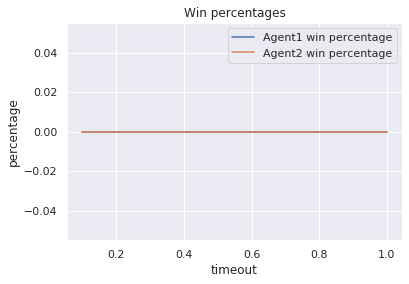

In [10]:
"""MCTS agent with UCB, c=sqrt(2), timeout=1 tree policy against 
MCTS agent with UCB, c=sqrt(2) tree policy with various timeout values"""

samples = 10
env = CTicTacToeEnv()
wins = []
losses= []
timeouts=[]
agent1 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=1)
for t in np.arange(0.1, 1.1, 0.1):
    agent2 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=t)
    agents = [agent1, agent2]
    rewards = np.array([run_episode(agents, env) for _ in range(samples)])
    results = np.sum(rewards==1, axis=0)
    wins.append(results[0])
    losses.append(results[1])
    timeouts.append(t)
plt.plot(timeouts, np.array(wins)*100/samples, label='Agent1 win percentage')
plt.plot(timeouts, np.array(losses)*100/samples, label='Agent2 win percentage')
plt.title("Win percentages")
plt.xlabel("timeout")
plt.ylabel("percentage")
plt.legend();

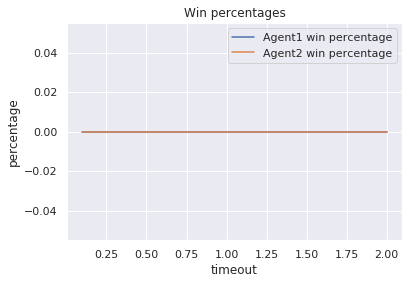

In [11]:
"""MCTS agent with UCB, c=sqrt(2), timeout=1 tree policy against 
MCTS agent with UCB, c=sqrt(2) tree policy with various timeout values"""

samples = 10
env = CTicTacToeEnv()
wins = []
losses= []
timeouts=[]
agent1 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=1)
for t in np.arange(0.1, 2.1, 0.1):
    agent2 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=t)
    agents = [agent1, agent2]
    rewards = np.array([run_episode(agents, env) for _ in range(samples)])
    results = np.sum(rewards==1, axis=0)
    wins.append(results[0])
    losses.append(results[1])
    timeouts.append(t)
plt.plot(timeouts, np.array(wins)*100/samples, label='Agent1 win percentage')
plt.plot(timeouts, np.array(losses)*100/samples, label='Agent2 win percentage')
plt.title("Win percentages")
plt.xlabel("timeout")
plt.ylabel("percentage")
plt.legend();

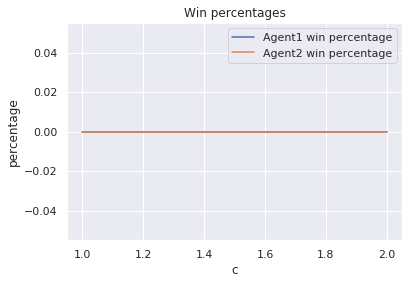

In [12]:
"""MCTS agent with UCB, c=sqrt(2), timeout=1 tree policy against 
MCTS agent with UCB, timeout=1 tree policy with various values of c"""

samples = 10
env = CTicTacToeEnv()
wins = []
losses= []
cvalues=[]
agent1 = MCTSAgent(tree_policy=ucb(c=np.sqrt(2)),timeout=1)
for cval in np.arange(1, 2.1, 0.1):
    agent2 = MCTSAgent(tree_policy=ucb(c=cval),timeout=1)
    agents = [agent1, agent2]
    rewards = np.array([run_episode(agents, env) for _ in range(samples)])
    results = np.sum(rewards==1, axis=0)
    wins.append(results[0])
    losses.append(results[1])
    cvalues.append(cval)
plt.plot(cvalues, np.array(wins)*100/samples, label='Agent1 win percentage')
plt.plot(cvalues, np.array(losses)*100/samples, label='Agent2 win percentage')
plt.title("Win percentages")
plt.xlabel("c")
plt.ylabel("percentage")
plt.legend();